In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [5]:
data = pd.read_csv('TSLA (2).csv')




In [6]:
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [7]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [9]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10  
X_train = create_sequences(train_data, sequence_length)
X_test = create_sequences(test_data, sequence_length)

In [14]:
y_train = train_data[sequence_length:, 0] 

In [15]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
model.fit(X_train, y_train, batch_size=64, epochs=50)


Epoch 1/50
15/15 [==============================] - 5s 17ms/step - loss: 0.0322
Epoch 2/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 3/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0011
Epoch 4/50
15/15 [==============================] - 0s 18ms/step - loss: 7.2585e-04
Epoch 5/50
15/15 [==============================] - 0s 18ms/step - loss: 5.6655e-04
Epoch 6/50
15/15 [==============================] - 0s 18ms/step - loss: 5.5208e-04
Epoch 7/50
15/15 [==============================] - 0s 17ms/step - loss: 5.1567e-04
Epoch 8/50
15/15 [==============================] - 0s 17ms/step - loss: 5.2033e-04
Epoch 9/50
15/15 [==============================] - 0s 17ms/step - loss: 5.0463e-04
Epoch 10/50
15/15 [==============================] - 0s 17ms/step - loss: 4.9274e-04
Epoch 11/50
15/15 [==============================] - 0s 17ms/step - loss: 5.1900e-04
Epoch 12/50
15/15 [==============================] - 0s 17ms/step - loss: 4.7747e-04
E

In [17]:
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)


8/8 [==============================] - 1s 7ms/step


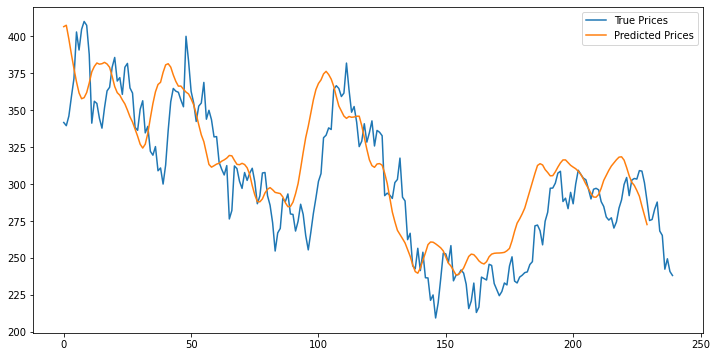

In [18]:
test_data = scaler.inverse_transform(test_data)
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='True Prices')
plt.plot(predicted_values, label='Predicted Prices')
plt.legend()
plt.show()
